In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import seaborn as sns
#importing packages for the prediction of time-series data
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#configuring the Environment
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

ModuleNotFoundError: No module named 'sklearn'

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import seaborn as sns
#importing packages for the prediction of time-series data
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#configuring the Environment
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
crypto_data = {}

crypto_data['bitcoin'] = pd.read_csv("E:\\bitcoin_price.csv", parse_dates=['Date'])
crypto_data['bitcoin_cash'] = pd.read_csv("E:\\bitcoin_cash_price.csv", parse_dates=['Date'])
crypto_data['dash'] = pd.read_csv("E:\\dash_price.csv", parse_dates=['Date'])
crypto_data['ethereum'] = pd.read_csv("G:\\ethereum_price.csv", parse_dates=['Date'])
crypto_data['iota'] = pd.read_csv("E:\\iota_price.csv", parse_dates=['Date'])
crypto_data['litecoin'] = pd.read_csv("E:\\litecoin_price.csv", parse_dates=['Date'])
crypto_data['monero'] = pd.read_csv("E:\\monero_price.csv", parse_dates=['Date'])
crypto_data['nem'] = pd.read_csv("E:\\nem_price.csv", parse_dates=['Date'])
crypto_data['neo'] = pd.read_csv("E:\\neo_price.csv", parse_dates=['Date'])
crypto_data['numeraire'] = pd.read_csv("E:\\numeraire_price.csv", parse_dates=['Date'])
crypto_data['ripple'] = pd.read_csv("E:\\ripple_price.csv", parse_dates=['Date'])
crypto_data['stratis'] = pd.read_csv("E:\\stratis_price.csv", parse_dates=['Date'])
crypto_data['waves'] = pd.read_csv("E:\\waves_price.csv", parse_dates=['Date'])

FileNotFoundError: File b'G:\\ethereum_price.csv' does not exist

In [3]:
crypto_data = {}

crypto_data['bitcoin'] = pd.read_csv("E:\\bitcoin_price.csv", parse_dates=['Date'])
crypto_data['bitcoin_cash'] = pd.read_csv("E:\\bitcoin_cash_price.csv", parse_dates=['Date'])
crypto_data['dash'] = pd.read_csv("E:\\dash_price.csv", parse_dates=['Date'])
crypto_data['ethereum'] = pd.read_csv("E:\\ethereum_price.csv", parse_dates=['Date'])
crypto_data['iota'] = pd.read_csv("E:\\iota_price.csv", parse_dates=['Date'])
crypto_data['litecoin'] = pd.read_csv("E:\\litecoin_price.csv", parse_dates=['Date'])
crypto_data['monero'] = pd.read_csv("E:\\monero_price.csv", parse_dates=['Date'])
crypto_data['nem'] = pd.read_csv("E:\\nem_price.csv", parse_dates=['Date'])
crypto_data['neo'] = pd.read_csv("E:\\neo_price.csv", parse_dates=['Date'])
crypto_data['numeraire'] = pd.read_csv("E:\\numeraire_price.csv", parse_dates=['Date'])
crypto_data['ripple'] = pd.read_csv("E:\\ripple_price.csv", parse_dates=['Date'])
crypto_data['stratis'] = pd.read_csv("E:\\stratis_price.csv", parse_dates=['Date'])
crypto_data['waves'] = pd.read_csv("E:\\waves_price.csv", parse_dates=['Date'])

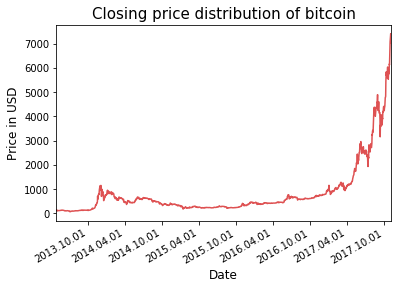

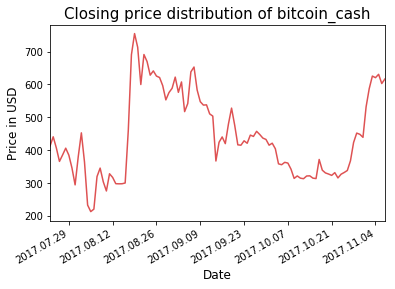

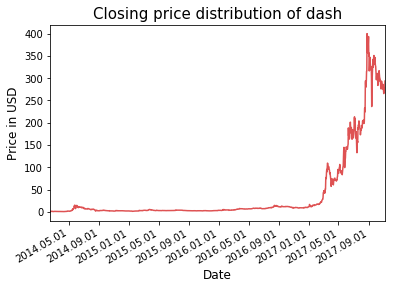

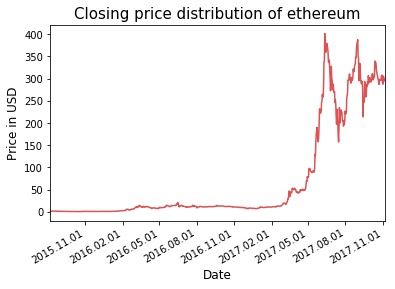

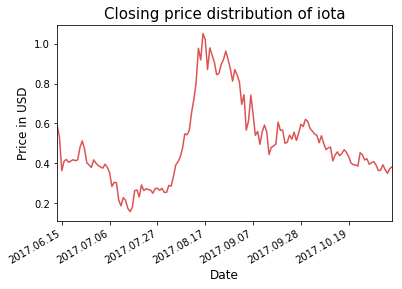

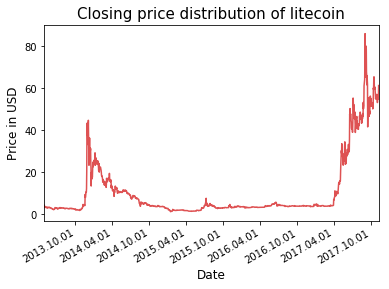

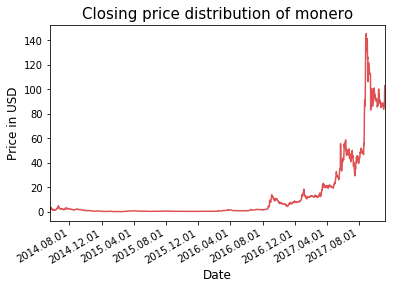

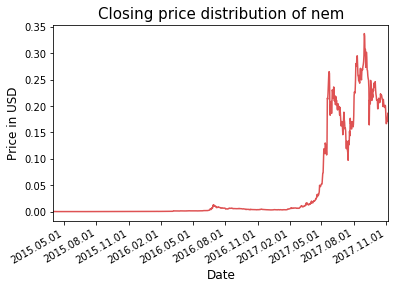

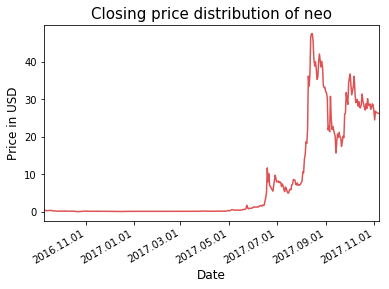

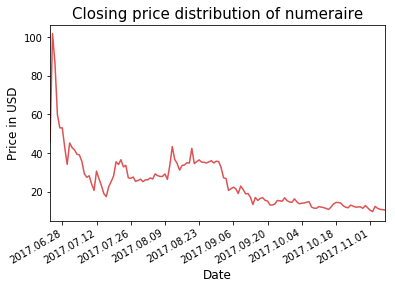

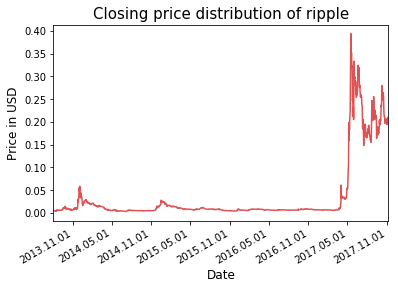

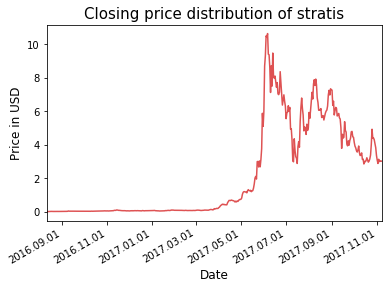

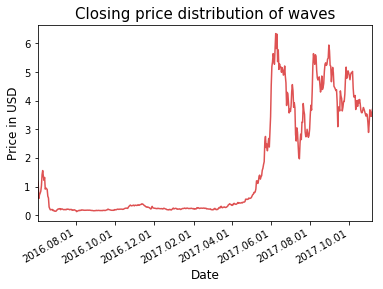

In [4]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    df = df[['Date' , 'Close']]
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x)) # making new column 'Date_mpl' by using date2num lamba function
    fig, ax = plt.subplots(figsize=(6,4))
    sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[3], ax=ax)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    fig.autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + coin
    plt.title(title_str, fontsize=15)
    plt.show()

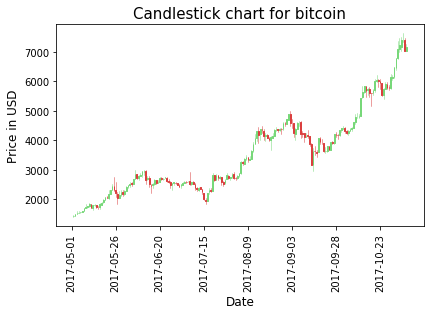

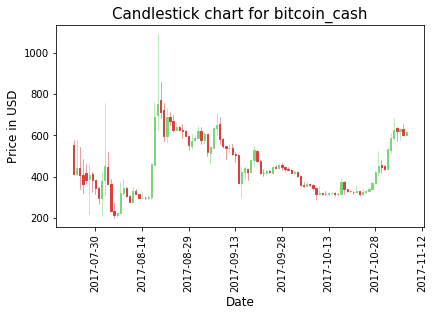

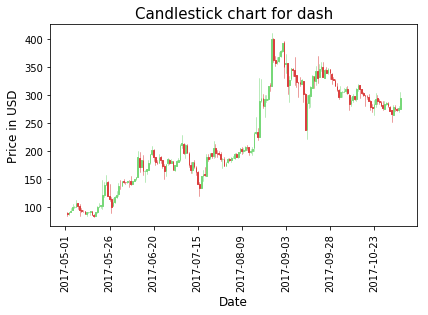

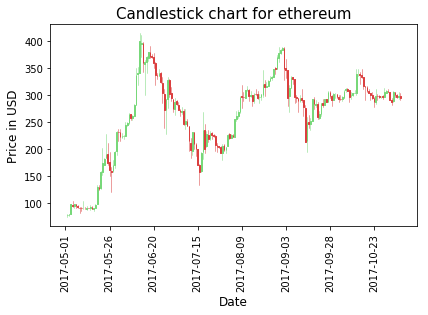

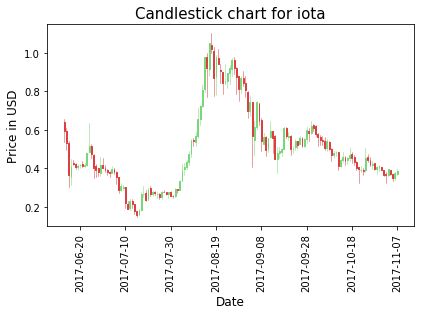

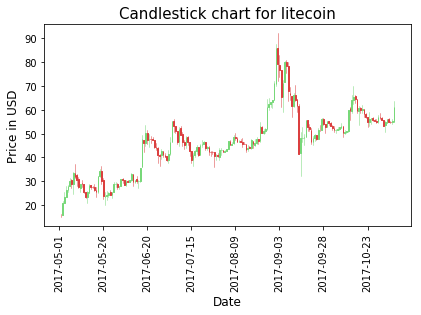

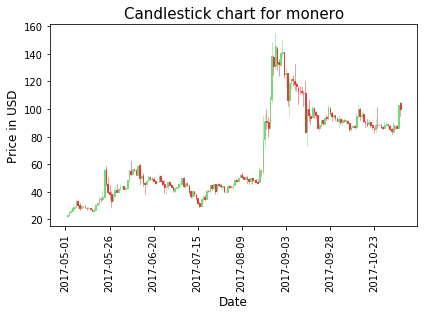

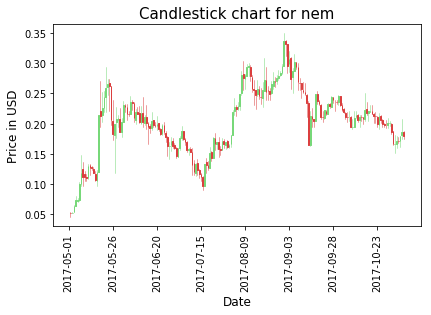

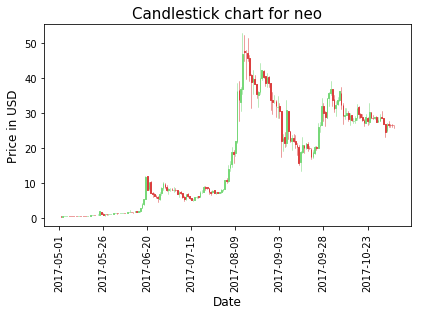

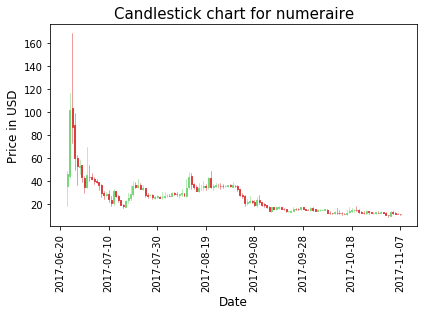

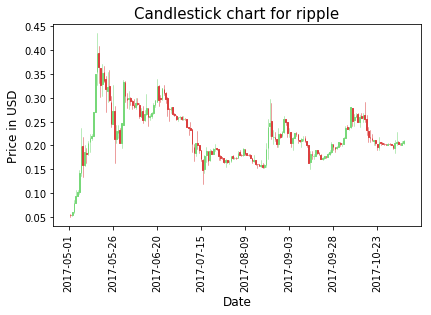

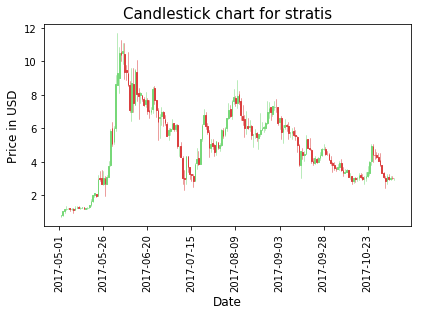

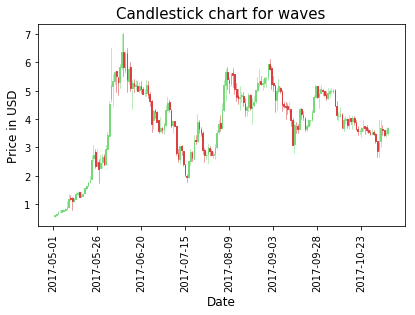

In [5]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    fig = plt.figure(figsize=(6,4))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))
    temp_df = df[df['Date']>'2017-05-01']
    ohlc = []
    for ind, row in temp_df.iterrows():
        ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
        ohlc.append(ol)

    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

    plt.xlabel("Date", fontsize=12)
    plt.xticks(rotation='vertical')
    plt.ylabel("Price in USD", fontsize=12 )
    title_str = "Candlestick chart for " + coin
    plt.title(title_str, fontsize=15)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


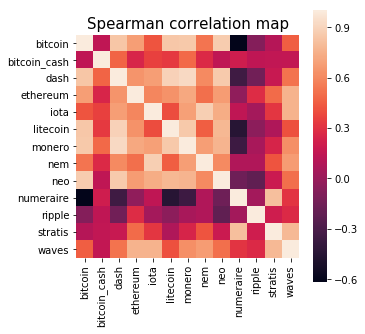

,bitcoin,bitcoin_cash,dash,ethereum,iota,litecoin,monero,nem,neo,numeraire,ripple,stratis,waves
bitcoin,1.000000,0.141531,0.837718,0.683191,0.424855,0.846564,0.851129,0.526908,0.863939,-0.617855,-0.079230,0.105568,0.454651
bitcoin_cash,0.141531,1.000000,0.472097,0.254033,0.358714,0.335488,0.489098,0.268766,0.145480,0.209120,0.145218,0.149123,0.159260
dash,0.837718,0.472097,1.000000,0.645247,0.682032,0.890097,0.921967,0.603366,0.854808,-0.348204,-0.149875,0.177097,0.519932
ethereum,0.683191,0.254033,0.645247,1.000000,0.591088,0.639180,0.720051,0.512256,0.673426,-0.030706,0.285024,0.498794,0.760898
iota,0.424855,0.358714,0.682032,0.591088,1.000000,0.398426,0.688124,0.879842,0.738860,0.142145,0.043065,0.319815,0.765376
litecoin,0.846564,0.335488,0.890097,0.639180,0.398426,1.000000,0.851743,0.455581,0.778852,-0.451992,-0.048582,0.080521,0.406146
monero,0.851129,0.489098,0.921967,0.720051,0.688124,0.851743,1.000000,0.679041,0.767068,-0.354464,0.053967,0.246084,0.622530
nem,0.526908,0.268766,0.603366,0.512256,0.879842,0.455581,0.679041,1.000000,0.603212,0.086080,0.088948,0.422974,0.671906
neo,0.863939,0.145480,0.854808,0.673426,0.738860,0.778852,0.767068,0.603212,1.000000,-0.162128,-0.214318,0.190253,0.511512
numeraire,-0.617855,0.209120,-0.348204,-0.030706,0.142145,-0.451992,-0.354464,0.086080,-0.162128,1.000000,0.036629,0.814307,0.312207


In [6]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Spearman correlation map", fontsize=15)
plt.show()
temp_df.corr(method='spearman')

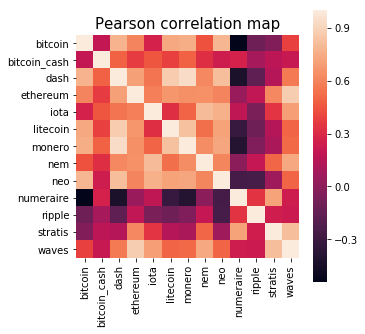

,bitcoin,bitcoin_cash,dash,ethereum,iota,litecoin,monero,nem,neo,numeraire,ripple,stratis,waves
bitcoin,1.000000,0.194349,0.774256,0.602797,0.269438,0.734401,0.754036,0.441011,0.784452,-0.543491,-0.112933,-0.037861,0.379233
bitcoin_cash,0.194349,1.000000,0.491853,0.371029,0.452584,0.389301,0.492319,0.321115,0.240230,0.264643,0.089765,0.168636,0.214808
dash,0.774256,0.491853,1.000000,0.703869,0.549233,0.873156,0.939194,0.617838,0.815597,-0.434615,-0.159908,0.140629,0.567324
ethereum,0.602797,0.371029,0.703869,1.000000,0.589040,0.666652,0.638401,0.645619,0.602494,0.053037,0.186172,0.616561,0.877597
iota,0.269438,0.452584,0.549233,0.589040,1.000000,0.320551,0.494532,0.812764,0.770635,0.182505,-0.058567,0.345621,0.697677
litecoin,0.734401,0.389301,0.873156,0.666652,0.320551,1.000000,0.830304,0.533745,0.714385,-0.317974,-0.113717,0.139500,0.498081
monero,0.754036,0.492319,0.939194,0.638401,0.494532,0.830304,1.000000,0.636001,0.726270,-0.394913,-0.047122,0.110810,0.513646
nem,0.441011,0.321115,0.617838,0.645619,0.812764,0.533745,0.636001,1.000000,0.608704,-0.004189,0.199637,0.503482,0.729446
neo,0.784452,0.240230,0.815597,0.602494,0.770635,0.714385,0.726270,0.608704,1.000000,-0.264702,-0.259895,0.065093,0.494256
numeraire,-0.543491,0.264643,-0.434615,0.053037,0.182505,-0.317974,-0.394913,-0.004189,-0.264702,1.000000,0.338873,0.714019,0.239480


In [7]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Pearson correlation map", fontsize=15)
plt.show()
temp_df.corr(method='pearson')

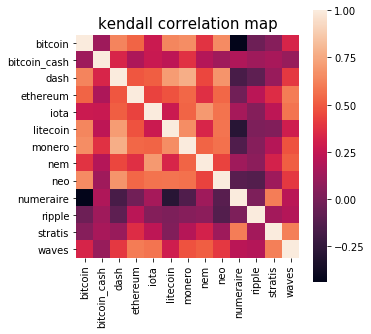

,bitcoin,bitcoin_cash,dash,ethereum,iota,litecoin,monero,nem,neo,numeraire,ripple,stratis,waves
bitcoin,1.000000,0.122371,0.628850,0.528001,0.277625,0.638685,0.659742,0.384127,0.651312,-0.441071,-0.037539,0.047830,0.328780
bitcoin_cash,0.122371,1.000000,0.332151,0.175177,0.271571,0.232993,0.376114,0.200606,0.128971,0.181598,0.130171,0.157658,0.104917
dash,0.628850,0.332151,1.000000,0.489682,0.514065,0.710096,0.771806,0.446282,0.681167,-0.165573,-0.088334,0.110043,0.402710
ethereum,0.528001,0.175177,0.489682,1.000000,0.432177,0.477328,0.543404,0.372943,0.543991,-0.023700,0.222736,0.358401,0.601712
iota,0.277625,0.271571,0.514065,0.432177,1.000000,0.275022,0.530361,0.699026,0.574791,0.150339,0.040726,0.234390,0.579084
litecoin,0.638685,0.232993,0.710096,0.477328,0.275022,1.000000,0.660780,0.331430,0.582936,-0.285185,0.019775,0.028602,0.292302
monero,0.659742,0.376114,0.771806,0.543404,0.530361,0.660780,1.000000,0.528072,0.566901,-0.141353,0.044782,0.205157,0.480680
nem,0.384127,0.200606,0.446282,0.372943,0.699026,0.331430,0.528072,1.000000,0.436863,0.131930,0.069286,0.315188,0.513214
neo,0.651312,0.128971,0.681167,0.543991,0.574791,0.582936,0.566901,0.436863,1.000000,-0.112052,-0.127893,0.124774,0.397736
numeraire,-0.441071,0.181598,-0.165573,-0.023700,0.150339,-0.285185,-0.141353,0.131930,-0.112052,1.000000,0.017987,0.611482,0.218196


In [8]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='kendall')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("kendall correlation map", fontsize=15)
plt.show()
temp_df.corr(method='kendall')

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=Tr

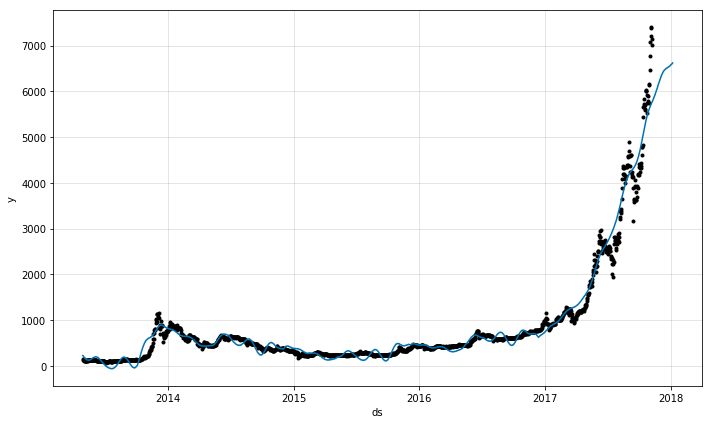

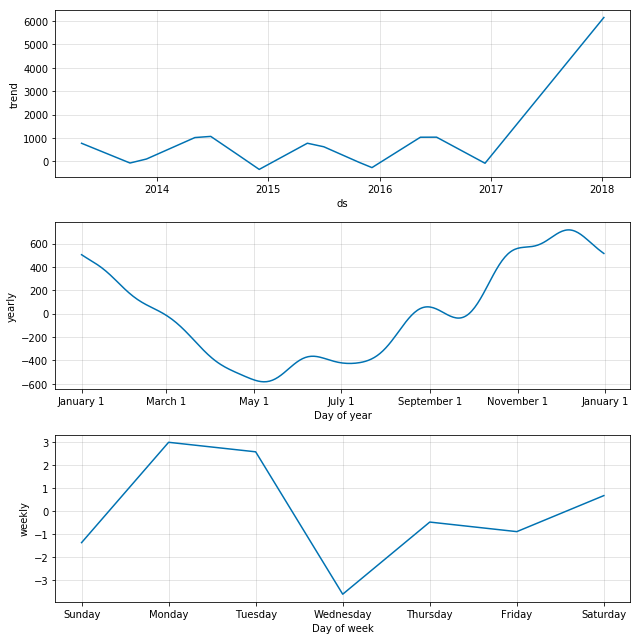

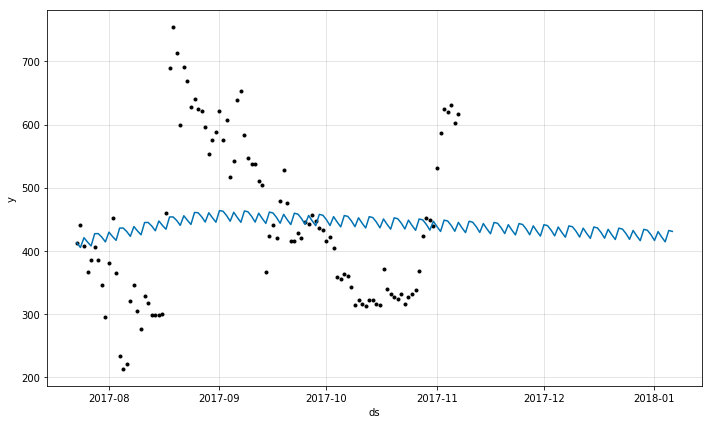

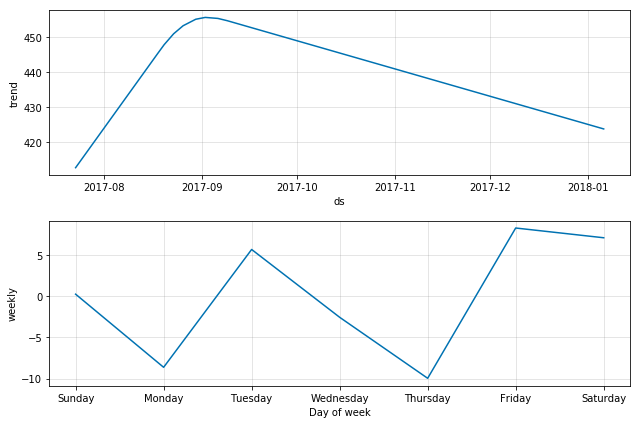

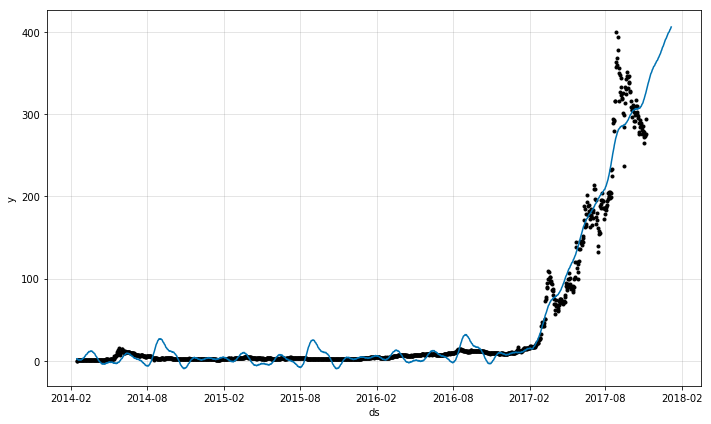

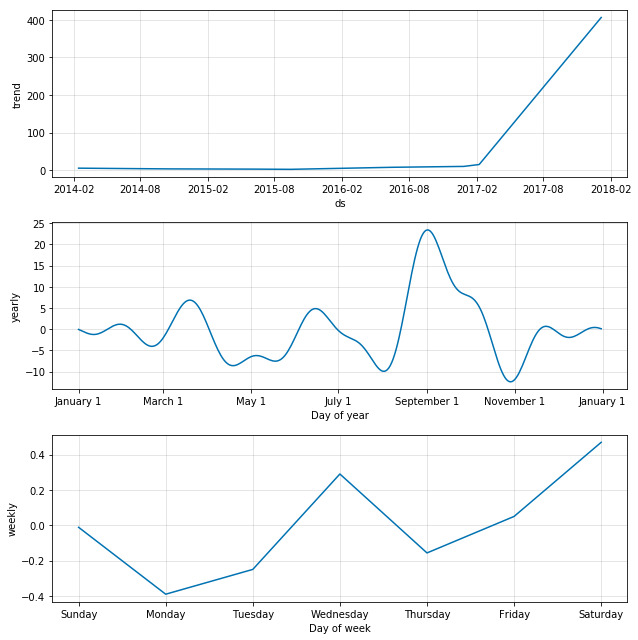

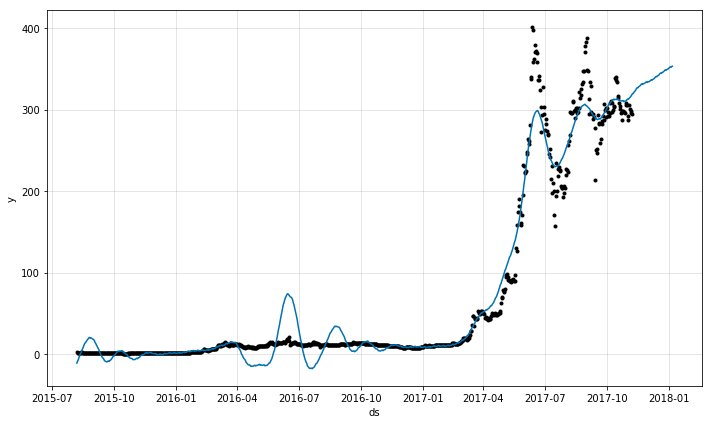

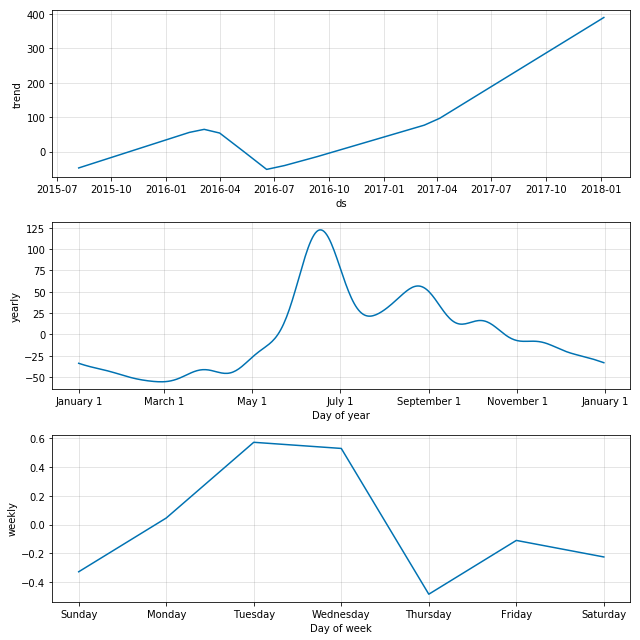

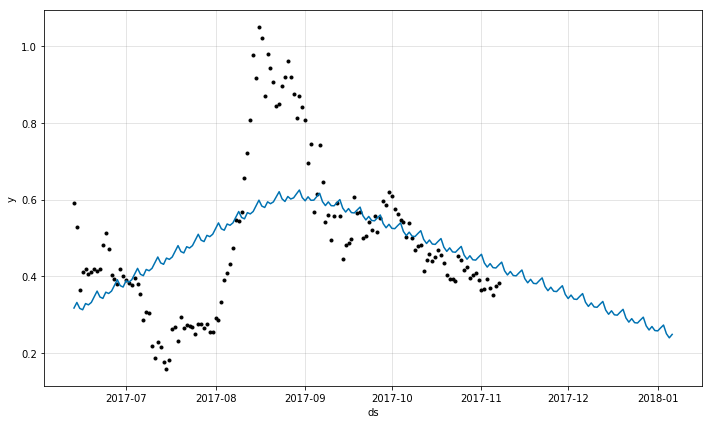

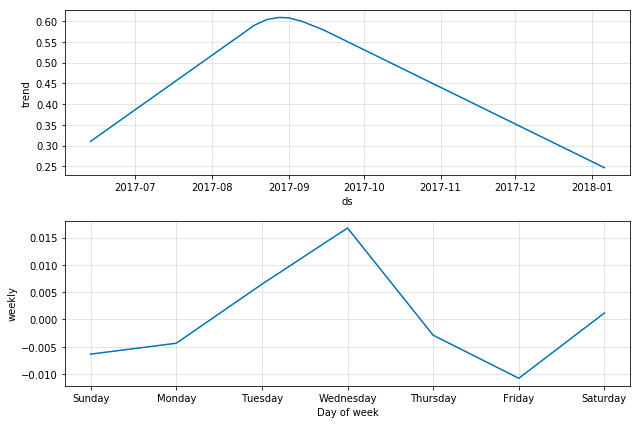

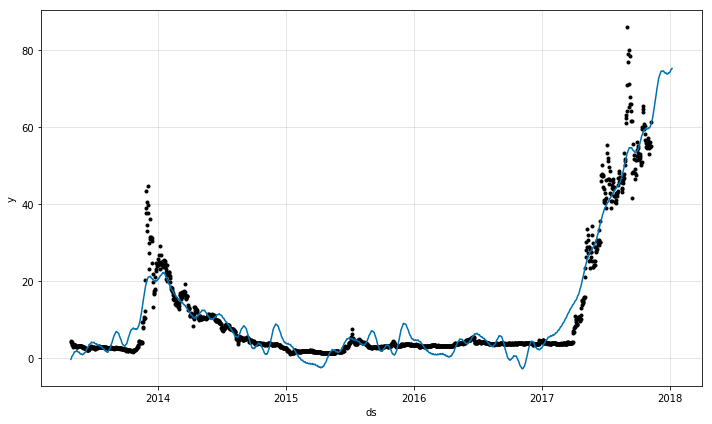

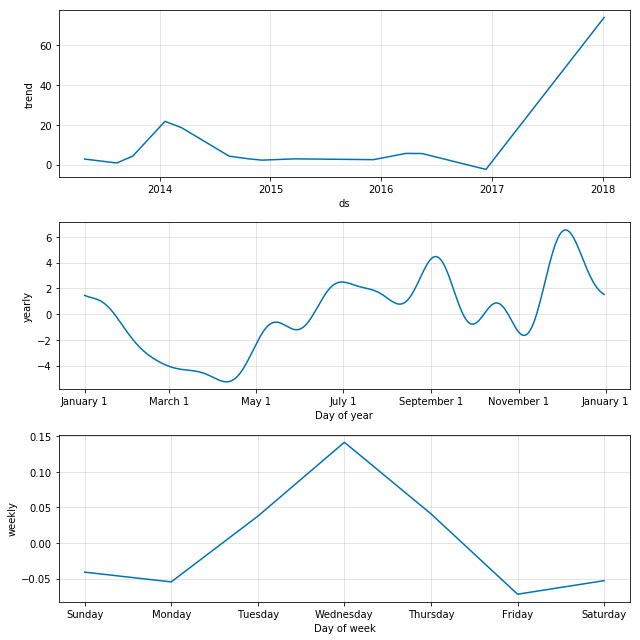

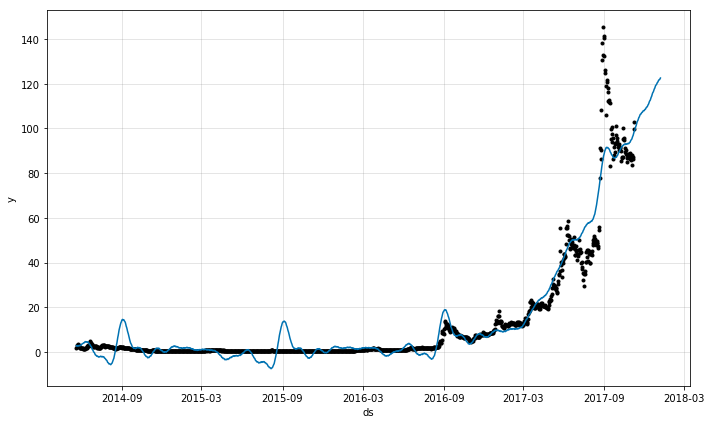

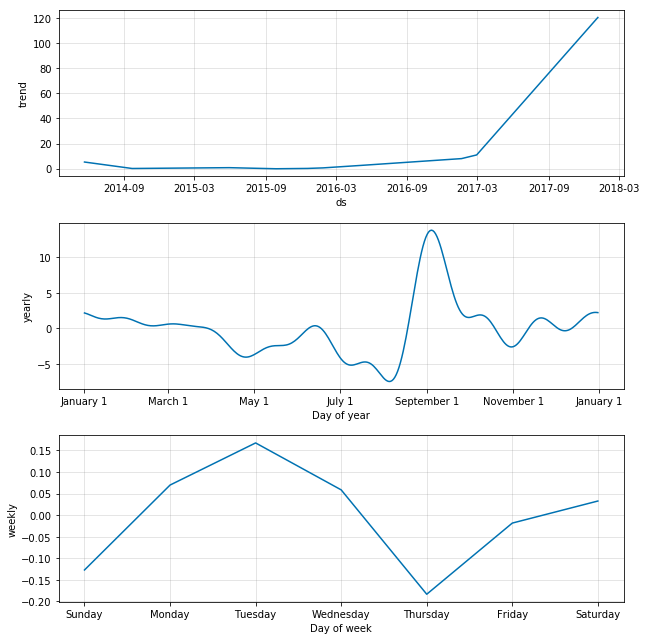

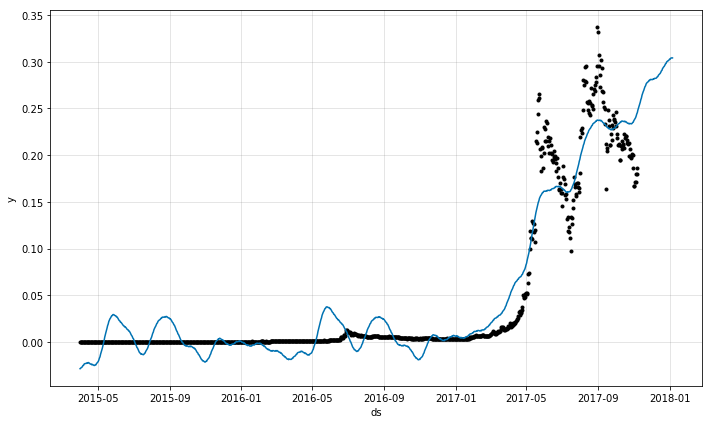

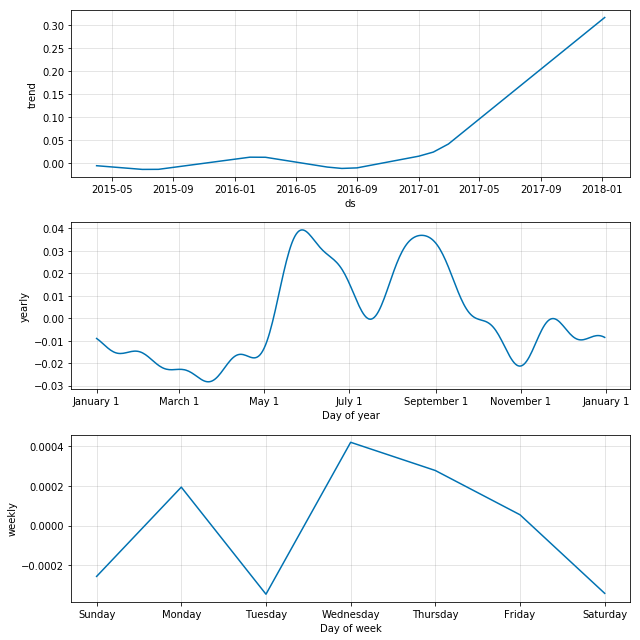

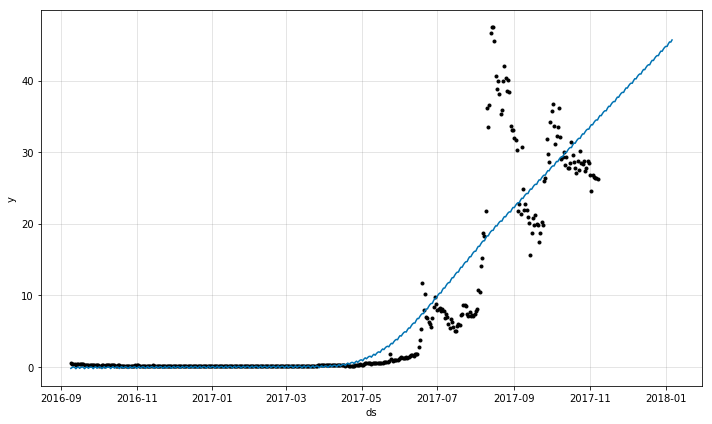

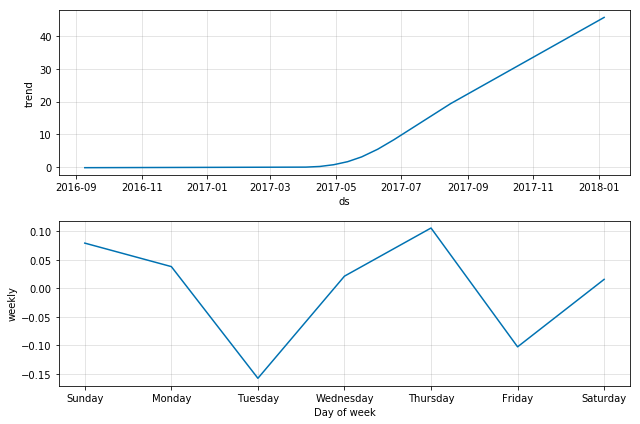

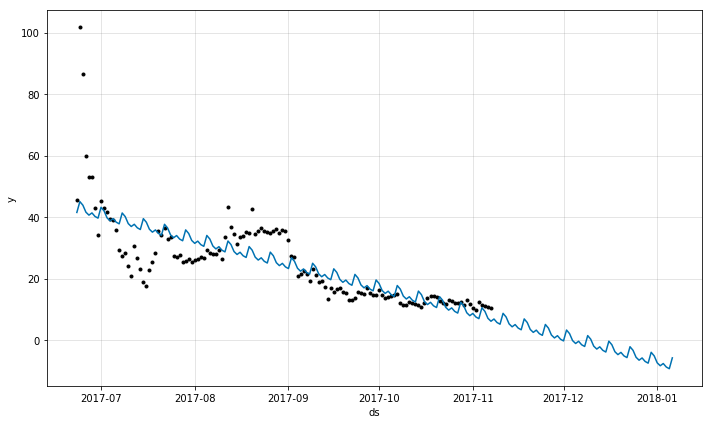

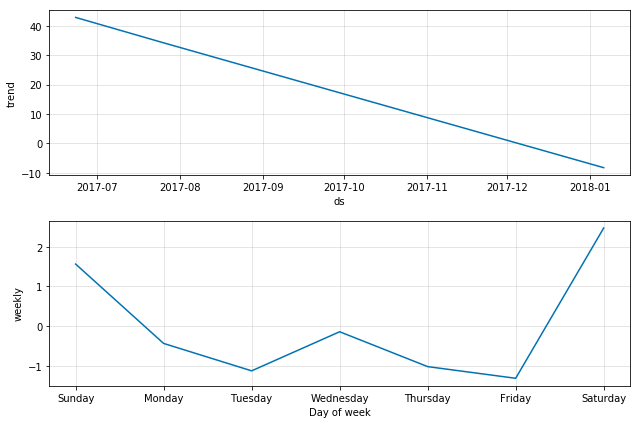

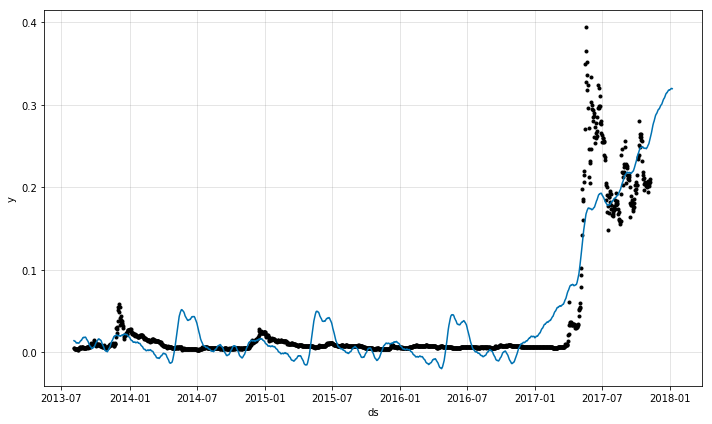

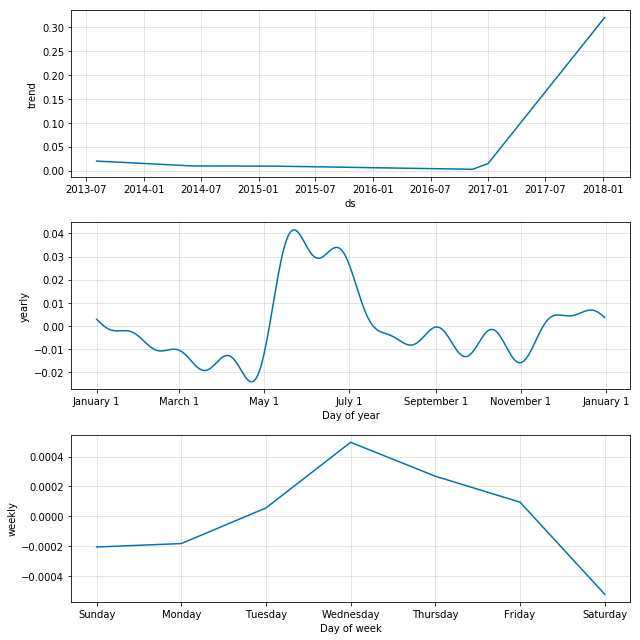

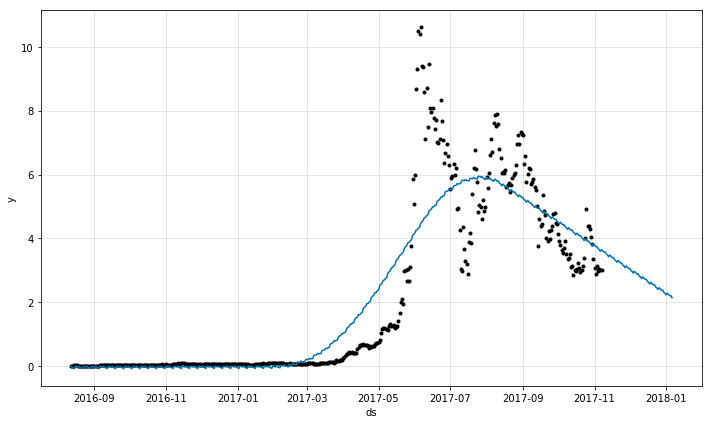

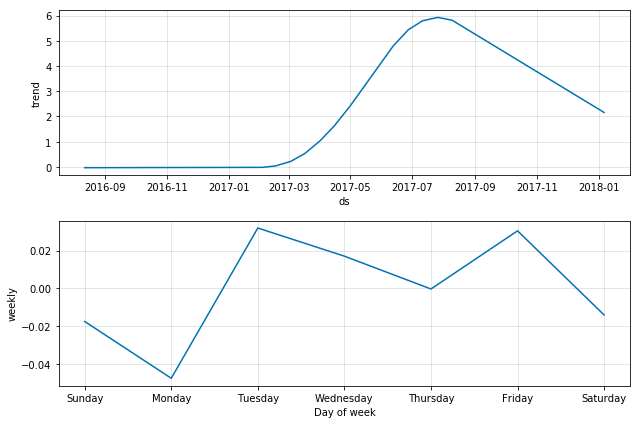

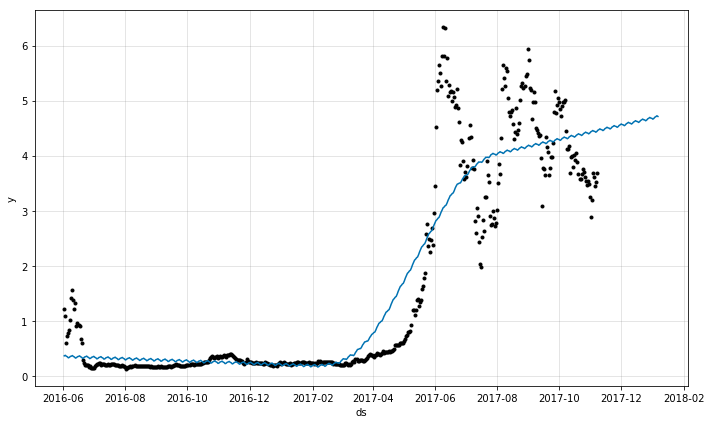

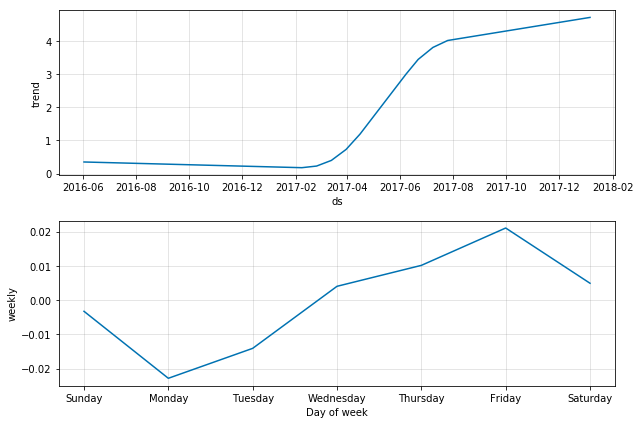

In [9]:
for coin in crypto_data:
     df = pd.DataFrame(crypto_data[coin])
     temp_df = pd.DataFrame()
     temp_df['ds'] = df['Date']
     temp_df['y'] = df['Close']
     temp_df['ds'] = temp_df['ds'].dt.to_pydatetime()
     model = Prophet()
     model.fit(temp_df)
     future = model.make_future_dataframe(periods = 60)
     forecast = model.predict(future)
     title_str = "predicted value of "+ coin
     model.plot(forecast, uncertainty=False)
     model.plot_components(forecast, uncertainty=False)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=Tr

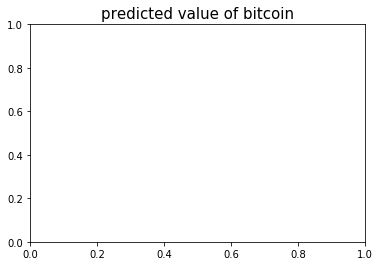

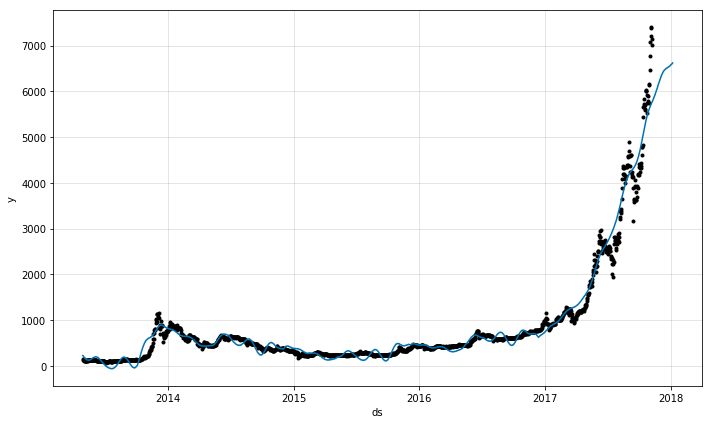

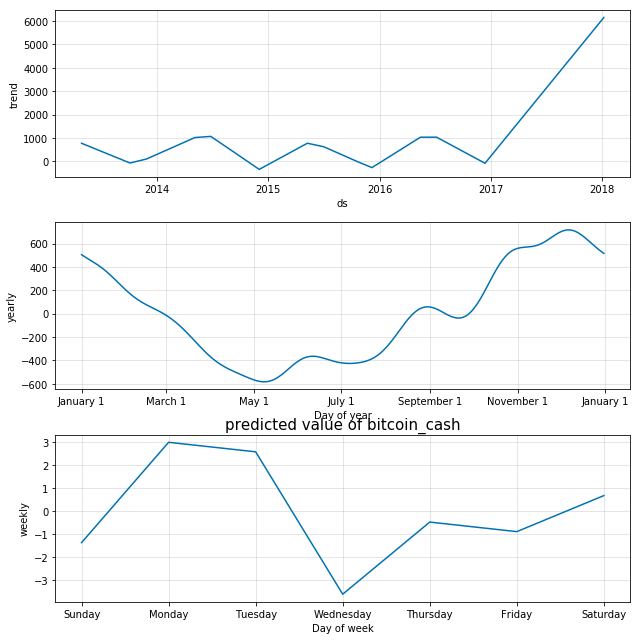

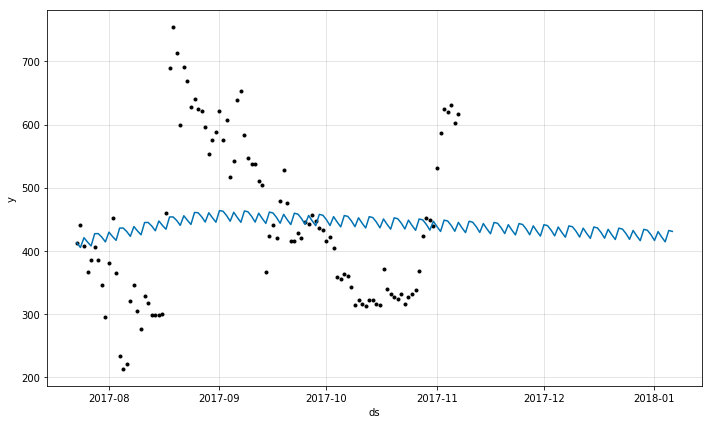

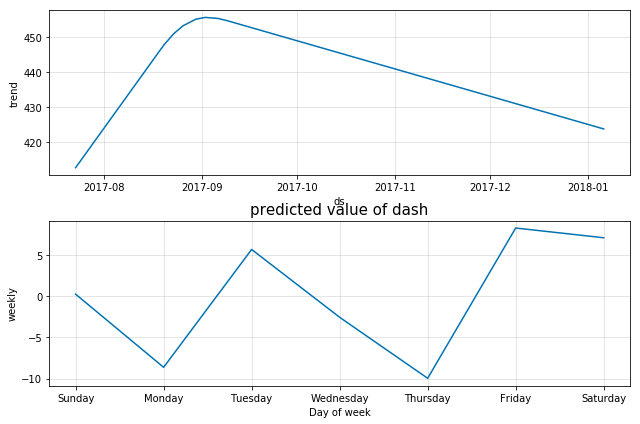

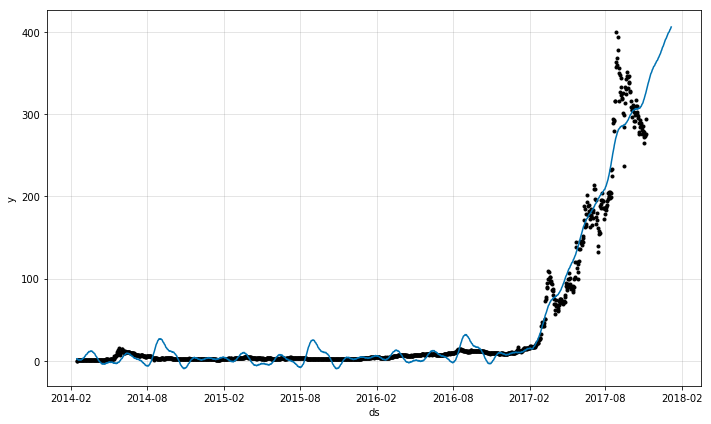

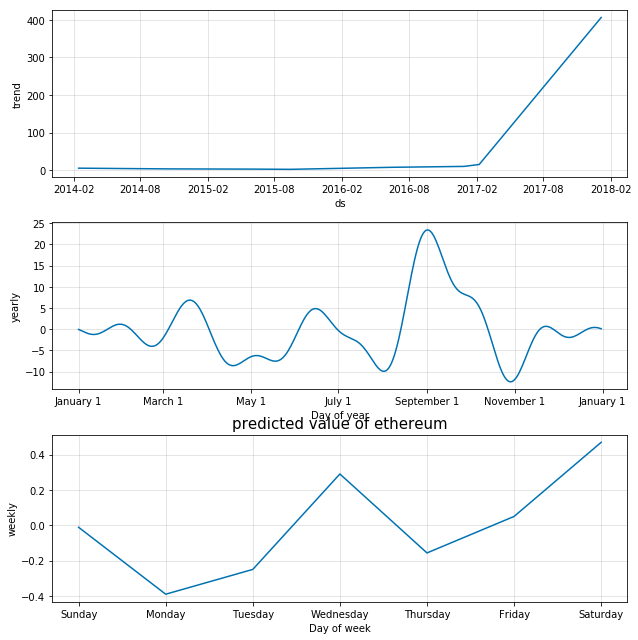

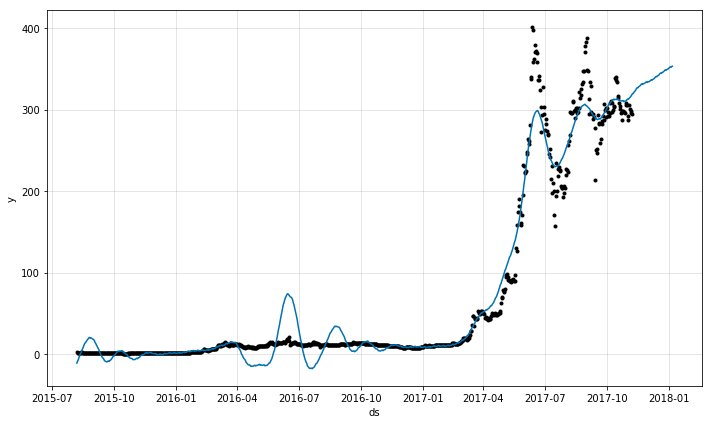

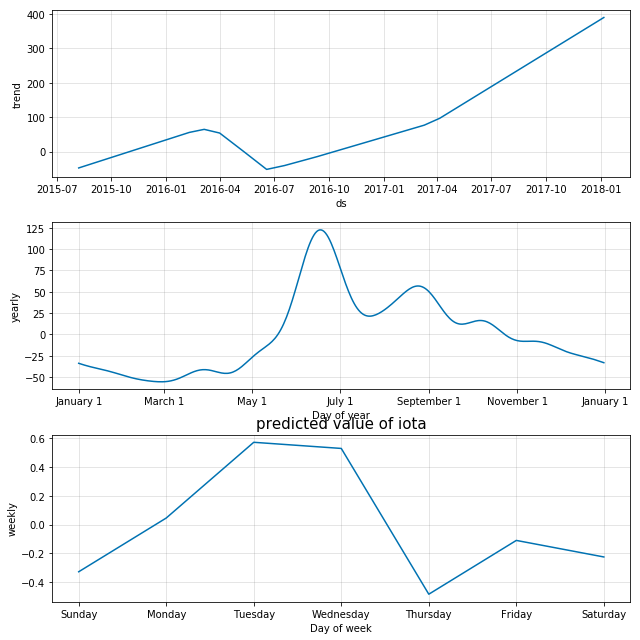

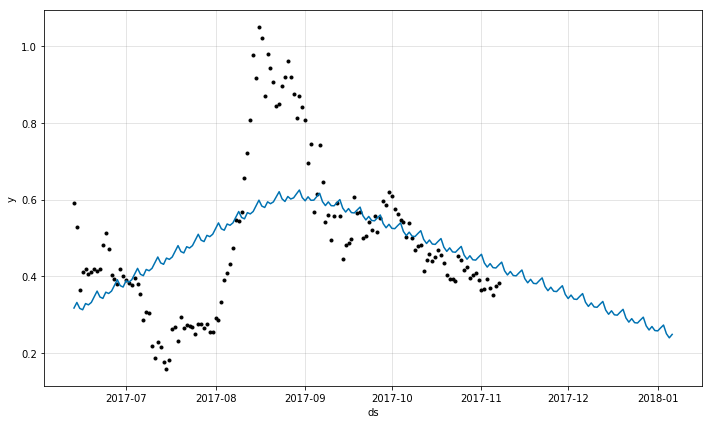

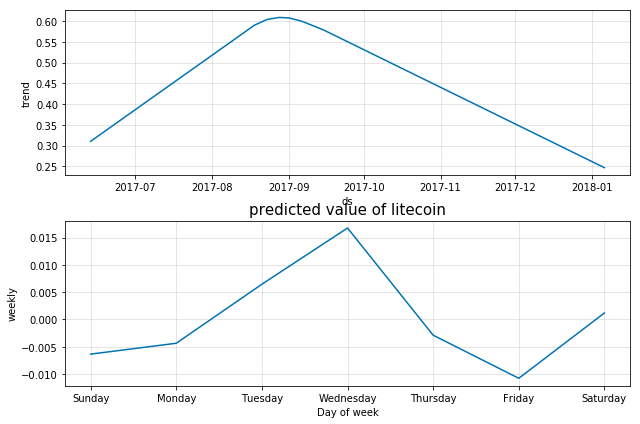

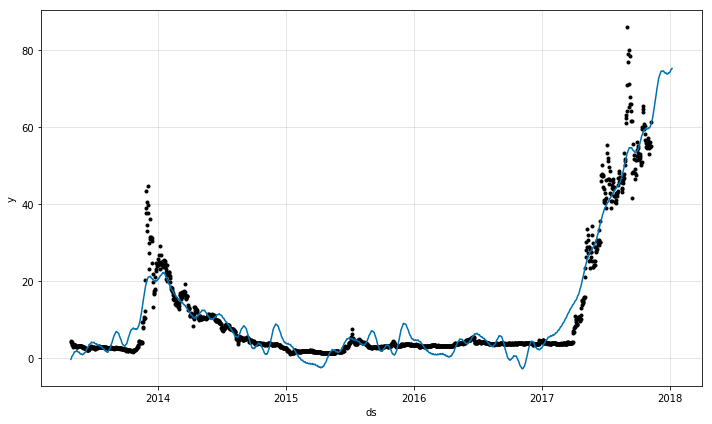

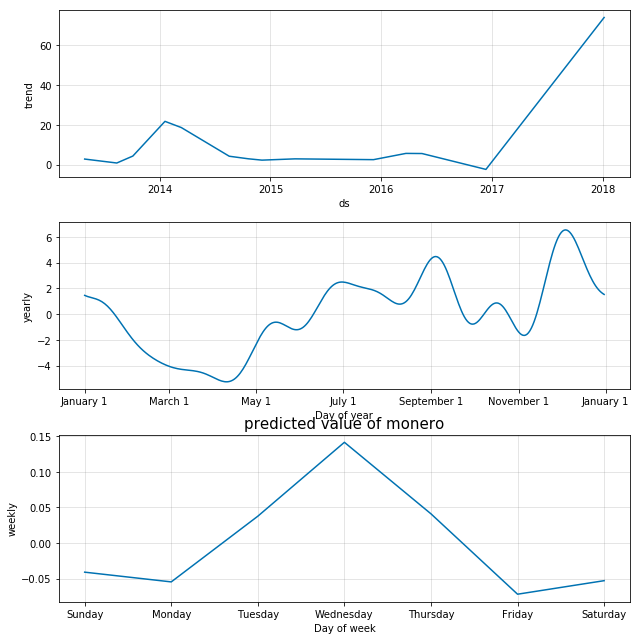

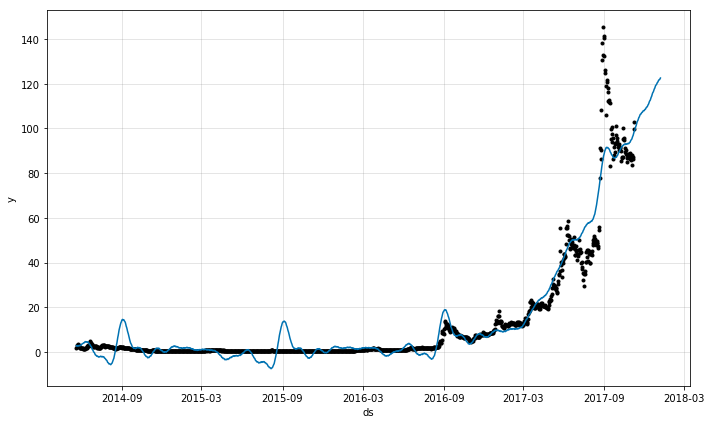

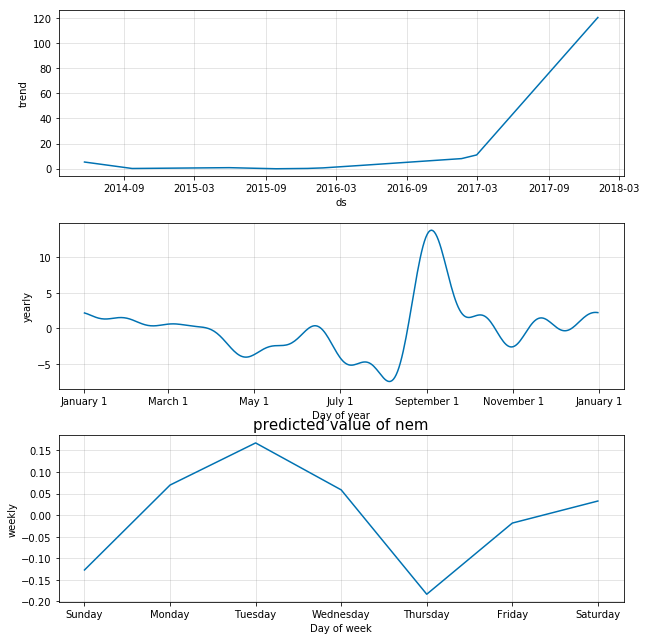

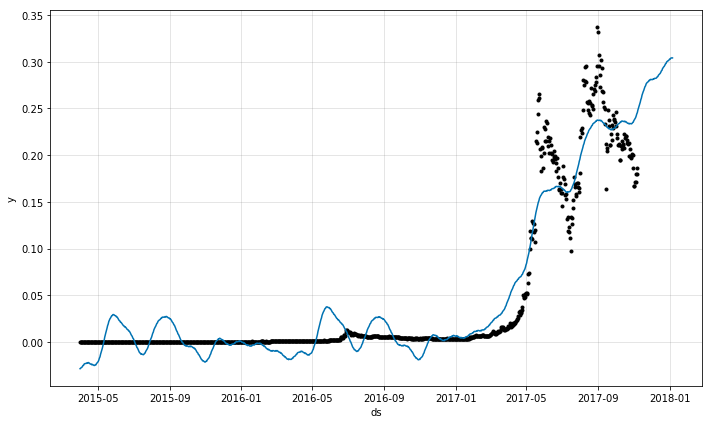

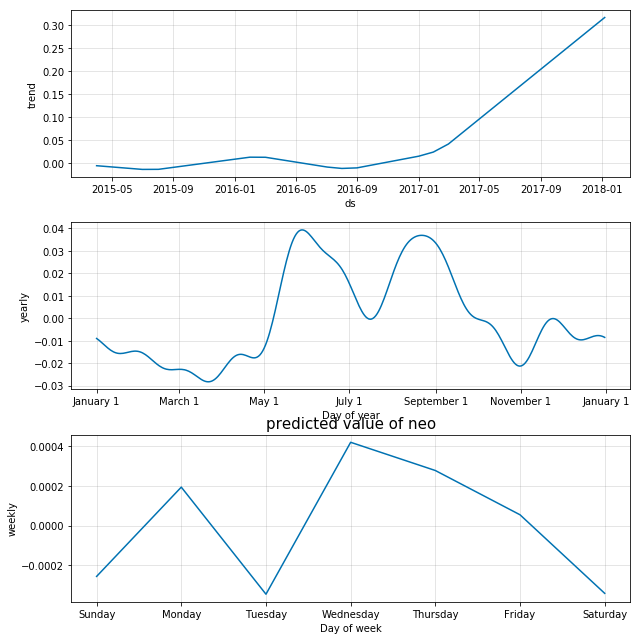

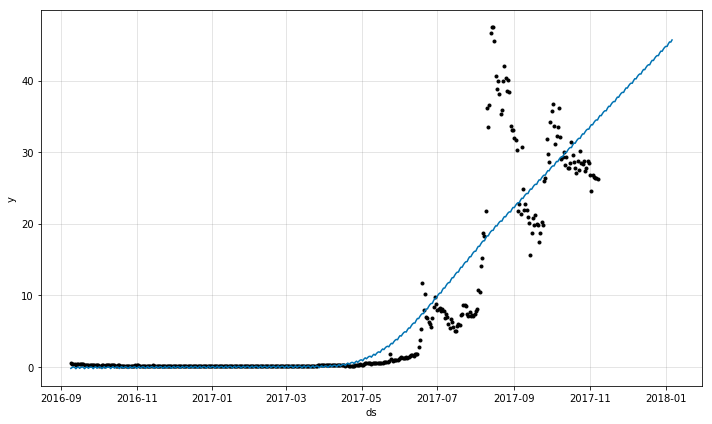

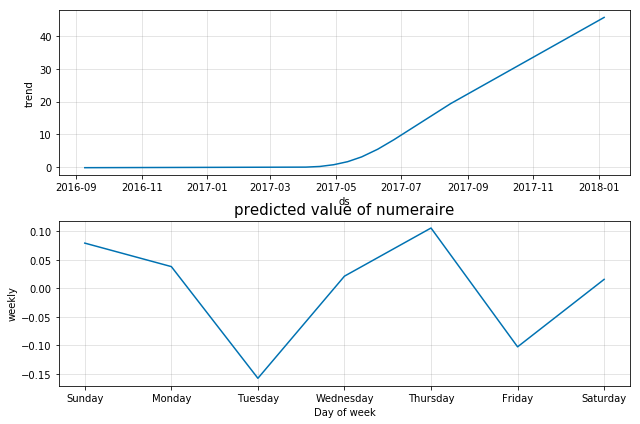

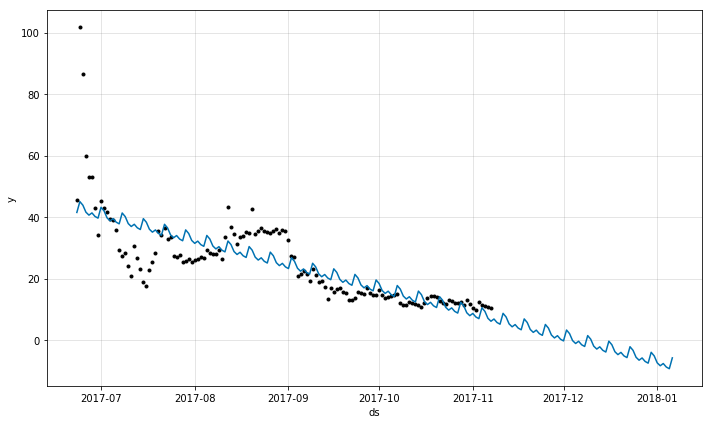

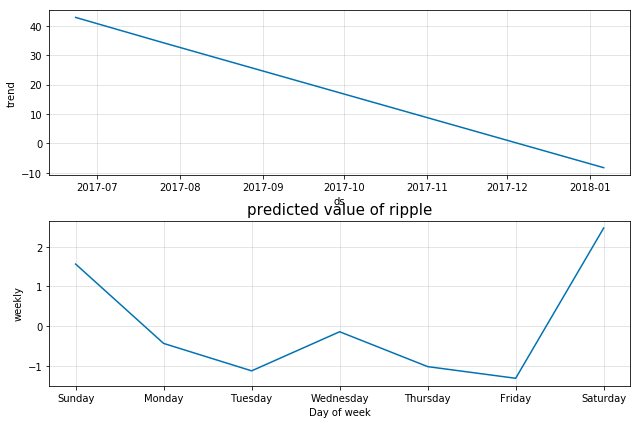

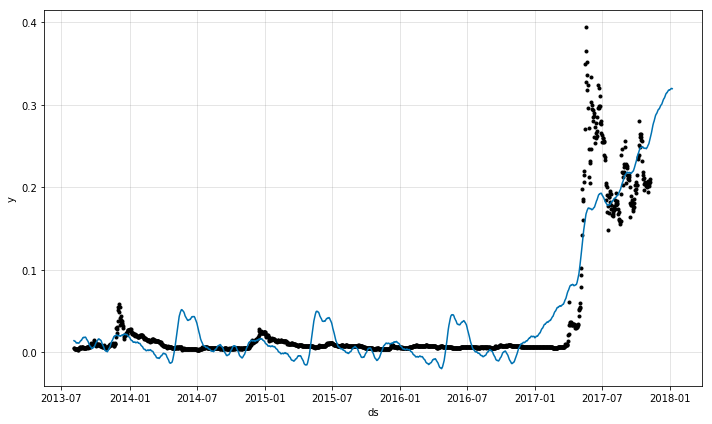

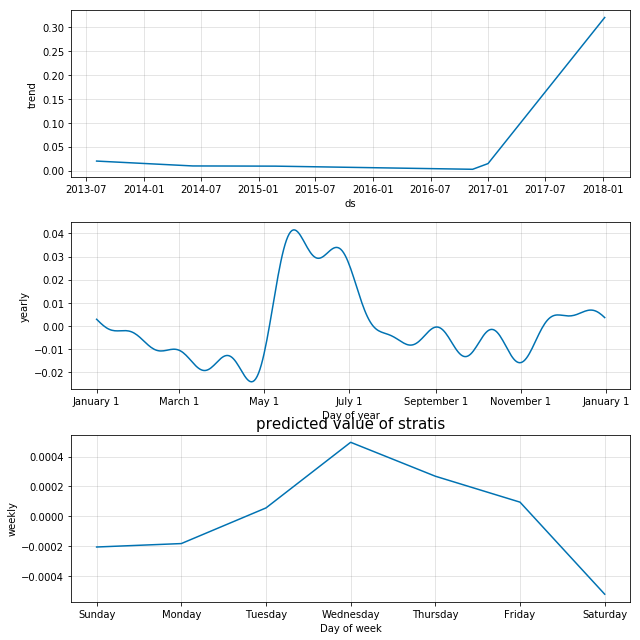

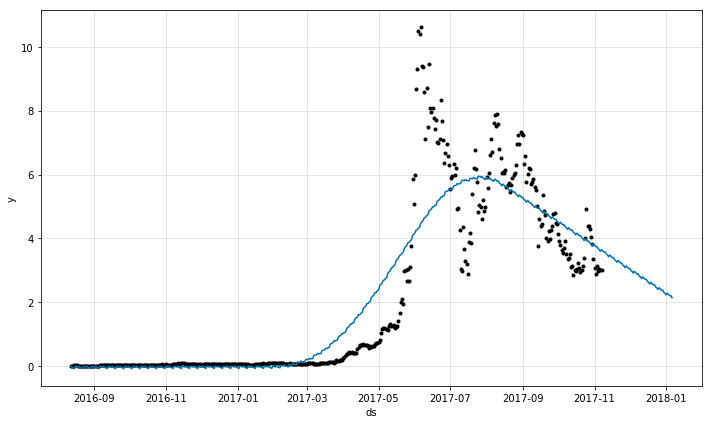

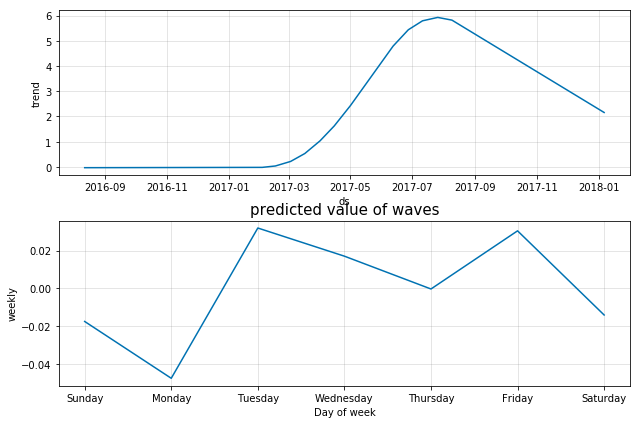

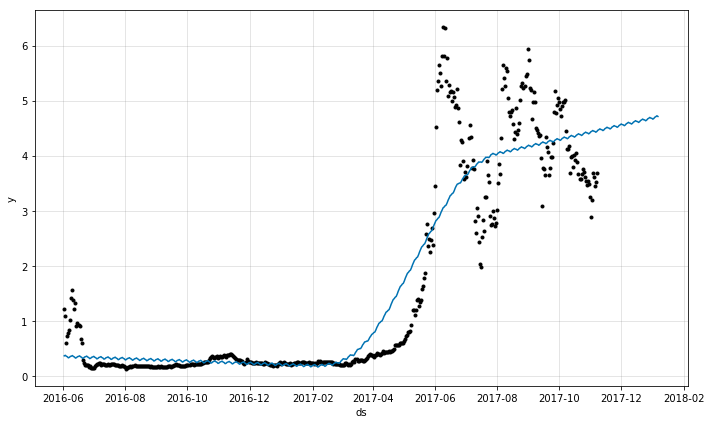

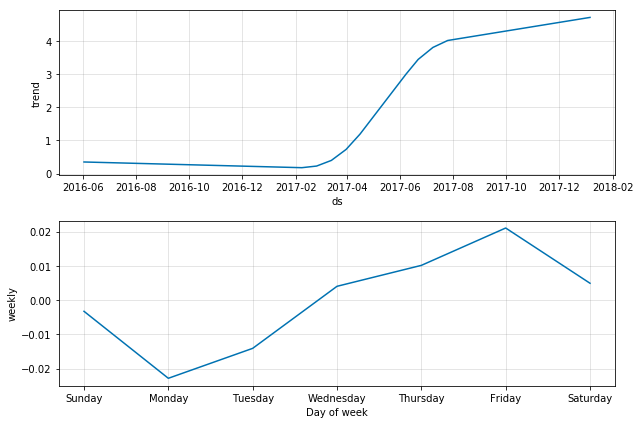

In [10]:
for coin in crypto_data:
     df = pd.DataFrame(crypto_data[coin])
     temp_df = pd.DataFrame()
     temp_df['ds'] = df['Date']
     temp_df['y'] = df['Close']
     temp_df['ds'] = temp_df['ds'].dt.to_pydatetime()
     model = Prophet()
     model.fit(temp_df)
     future = model.make_future_dataframe(periods = 60)
     forecast = model.predict(future)
     title_str = "predicted value of "+ coin
     plt.title(title_str, fontsize=15)    
     model.plot(forecast, uncertainty=False)
     model.plot_components(forecast, uncertainty=False)


In [11]:
df_bitcoin = pd.DataFrame(crypto_data['bitcoin'])

df_bitcoin = df_bitcoin[['Date','Close']]
df_bitcoin.set_index('Date', inplace = True)

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1654
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9154.460
Method:                       css-mle   S.D. of innovations             61.301
Date:                Mon, 29 Jan 2018   AIC                          18322.919
Time:                        16:18:32   BIC                          18360.796
Sample:                    11-06-2017   HQIC                         18336.961
                         - 04-28-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.2269      1.616     -2.615      0.009      -7.395      -1.059
ar.L1.D.Close     0.0086      0.025      0.350      0.726      -0.040       0.057
ar.L2.D.Close     0.0457      0.025     

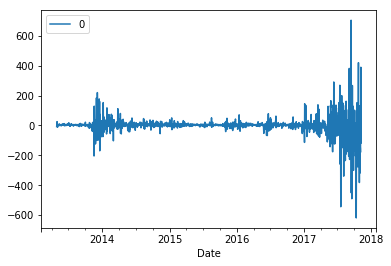

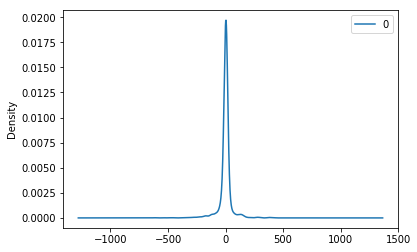

                 0
count  1654.000000
mean     -0.010300
std      61.326135
min    -618.505231
25%      -3.859363
50%       3.321146
75%       8.453873
max     704.355519


In [12]:
# fit model
model = ARIMA(df_bitcoin, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 1581.878532


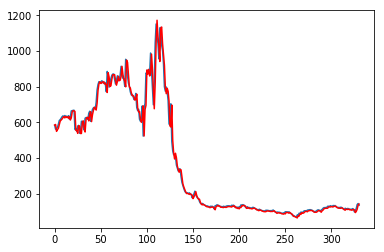

In [13]:
X = df_bitcoin.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test MSE: 1581.878532


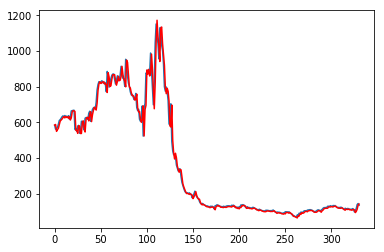

In [14]:
X = df_bitcoin.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))


331
331
[523601.7942017]
[331]
[1581.87853233]
Test MSE: 1581.878532


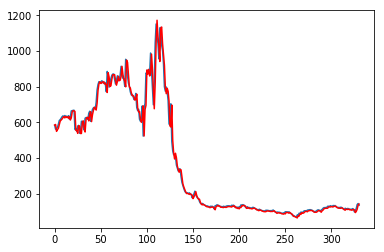

In [29]:
error = mean_squared_error(test, predictions)
print(len(test))

jef=test-predictions
#print(jef[0])
#print(jef[1])
jef=jef*jef
#print(jef[0])
#print(jef[1])
master=sum(jef)
den=[331]
ans=master/den
print(len(jef))

print(master)
print(den)
print(ans)
print('Test MSE: %f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [15]:
row_count=len(df_bitcoin)
print(row_count)

1655


In [16]:
X = df_bitcoin.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))


In [ ]:
#error = mean_squared_error(test, predictions)
#print('Test MSE: %f' % error)
# plot
error_pow_sum=0
while(row_count>0):
    error=(predictions-test)
    
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()